In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dem = [19604096, 28746736, 21188722, 138947814, 62987338, 53340089]

In [3]:
primary = pd.read_csv('data/us_prim.csv')
booster = pd.read_csv('data/us_boost1.csv')
booster2 = pd.read_csv('data/us_boost2.csv')
booster3 = pd.read_csv('data/us_boost3.csv')


In [4]:
primary['5_11'].iloc[0]

15702692.0

In [5]:
prim = primary

In [6]:
booster2

,Unnamed: 0,date,0_4,5_11,12_18,19_49,50_64,65+,65_diff,50_64_diff,19_49_diff,12_18_diff,5_11_diff
0,0,02/07/2022,0,0,2.598195e+06,3.105750e+07,2.481481e+07,3.151984e+07,0.000,0.0000,0.00,0.0000,0
1,1,02/08/2022,0,0,2.611152e+06,3.111268e+07,2.484549e+07,3.154718e+07,27341.875,30676.6375,55181.55,12957.3125,0
2,2,02/09/2022,0,0,2.624110e+06,3.116786e+07,2.487617e+07,3.157452e+07,27341.875,30676.6375,55181.55,12957.3125,0
3,3,02/10/2022,0,0,2.637067e+06,3.122304e+07,2.490684e+07,3.160186e+07,27341.875,30676.6375,55181.55,12957.3125,0
4,4,02/11/2022,0,0,2.650024e+06,3.127823e+07,2.493752e+07,3.162920e+07,27341.875,30676.6375,55181.55,12957.3125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,527,07/19/2023,0,0,1.052159e+07,7.859641e+07,3.996907e+07,3.367984e+07,0.000,0.0000,0.00,0.0000,0
528,528,07/20/2023,0,0,1.052159e+07,7.859641e+07,3.996907e+07,3.367984e+07,0.000,0.0000,0.00,0.0000,0
529,529,07/21/2023,0,0,1.052159e+07,7.859641e+07,3.996907e+07,3.367984e+07,0.000,0.0000,0.00,0.0000,0
530,530,07/22/2023,0,0,1.052159e+07,7.859641e+07,3.996907e+07,3.367984e+07,0.000,0.0000,0.00,0.0000,0


In [7]:
pop = data_dem
vacc_1 = np.zeros([6, 532])
vacc_2 = np.zeros([6, 532])
vacc_3 = np.zeros([6, 532])
vacc_4 = np.zeros([6, 532])


vacc_1[1,:] = primary['5_11_diff'].to_numpy()
vacc_1[2,:] = primary['12_18_diff'].to_numpy()
vacc_1[3,:] = primary['19_49_diff'].to_numpy()
vacc_1[4,:] = primary['50_64_diff'].to_numpy()
vacc_1[5,:] = primary['65_diff'].to_numpy()

vacc_2[2,:] = booster['12_18_diff'].to_numpy()
vacc_2[3,:] = booster['19_49_diff'].to_numpy()
vacc_2[4,:] = booster['50_64_diff'].to_numpy()
vacc_2[5,:] = booster['65_diff'].to_numpy()

vacc_3[2,:] = booster2['12_18_diff'].to_numpy()
vacc_3[3,:] = booster2['19_49_diff'].to_numpy()
vacc_3[4,:] = booster2['50_64_diff'].to_numpy()
vacc_3[5,:] = booster2['65_diff'].to_numpy()


vacc_4[2,:] = booster3['12_18_diff'].to_numpy()
vacc_4[3,:] = booster3['19_49_diff'].to_numpy()
vacc_4[4,:] = booster3['50_64_diff'].to_numpy()
vacc_4[5,:] = booster3['65_diff'].to_numpy()

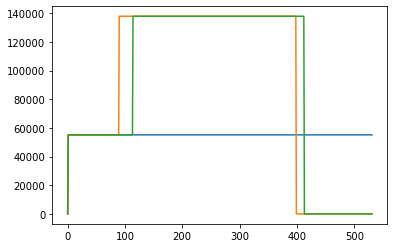

In [8]:
plt.plot(vacc_2[3,:])
plt.plot(vacc_3[3,:])
plt.plot(vacc_4[3,:])

In [9]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [10]:
def computerate(i, CWW, aW, I, Ni):  
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [11]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [12]:
US2 = pd.read_csv('data/fit_data_us.csv')

In [13]:
US2['new_case'] = US2['case'].diff().fillna(0)
US2['new_death'] = US2['death'].diff().fillna(0)

In [14]:
cases = US2['new_case'].to_numpy()
hosps = US2['hosp'].to_numpy()
deaths = US2['new_death'].to_numpy()

case_avg = np.zeros([73, ])         #133
hosp_avg = np.zeros([73, ])
death_avg = np.zeros([73, ])
for i in range(73):
    case_avg[i] = np.mean(cases[i:i+7])
    hosp_avg[i] = np.mean(hosps[i:i+7])
    death_avg[i] = np.mean(deaths[i:i+7])
    

In [15]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [16]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [17]:
prev2 = pd.read_excel('data/variants.xlsx')
prev_ba2 = prev2['ba2'].to_numpy()
prev_ba12 = prev2['ba12'].to_numpy()

In [18]:
N = np.sum(data_dem)
fac = 2.1
M3_0 = [fac*0.1, fac*0.15,fac*0.26, fac*0.226, fac*0.186, fac*0.128]
np.sum(np.array(data_dem)*np.array(M3_0))/N

0.3990779634357481

In [19]:
fac2 = 0.5

M2_0 = [0,  fac2*prim['5_11'].iloc[0]/(2*data_dem[1]),  fac2*prim['12_18'].iloc[0]/(2*data_dem[2]),  fac2*prim['19_49'].iloc[0]/(2*data_dem[3]),  fac2*prim['50_64'].iloc[0]/(2*data_dem[4]),  fac2*prim['65+'].iloc[0]/(2*data_dem[5])]
np.sum(np.array(data_dem)*np.array(M2_0))/N
#print(M_0)

0.43478427831206545

In [20]:
M22_0 = [0,  0,  booster['12_18'].iloc[0]/(data_dem[2]),  booster['19_49'].iloc[0]/(data_dem[3]),  booster['50_64'].iloc[0]/(data_dem[4]),  booster['65+'].iloc[0]/(data_dem[5])]
np.sum(np.array(data_dem)*np.array(M22_0))/N

0.2770512439250189

In [21]:
g_E = 1/(1.5)
g_hosp = 1/10
q = 2/3
Ni = data_dem

g_Recovery = 1/12
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [22]:
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, M22_ovv, MX_ovv,peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov = simulation_st(0, 1, 0, 1, 0)

NameError: name 'simulation_st' is not defined

In [ ]:
np.shape(case_avg)

In [ ]:
def sim_beta(x, x0, x01, x02, x03, x1, x2, x3):
    Nd = 80
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = M2_0
    M2 = np.zeros([6, ])
    M3 = M3_0
    M22 = M22_0
    MX = np.zeros([6, ])
    
    Mh = M2_0
    Mh2 = np.zeros([6, ])
    Mh3 = M3_0
    Mh22 = M22_0
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    MX_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w1 =  0.7/(6*30)
    w11 = 0.7/(4*30)
    wxw = 0.7/(16*30)
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w3 = 0.9/(4*30)
        www = 1/(8*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        www = 1/(16*30)
        
    
    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]
        
        if (sc1 == 1):
            pp = 0.2
            esc = 0.0
            esc2 = 0.0
        if (sc1 == 2):
            pp = 0.0
            esc = 0.3
            esc2 = 0.0
            
 
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]

        
        if (tt*dt < 20):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 20 and tt*dt < 41):
            bita = x01*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y1 + (tt*dt-20)*(y2 - y1)/20
            zx = z1 + (tt*dt-20)*(z2 - z1)/20

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20       
          
        if (tt*dt >= 81):
            sigma = 0.00
            
            x4 = 1.5*(x03)*(1 + prev2*pp)*(1+prev1*0.40)

            x4 = x4 + np.random.normal(0, std, 1)
            
            bita = x4*(1 + prev2*pp)*(1+prev1*0.40)/N

            #yx = ( y4 + y5 + yy5)/3
            yx = 0.81*yy5
            #yx = y5
            #zx = ( z4 + z5 + zz5)/3
            
            yx = y4
            zx = y4
            """
            if (tt*dt <= 116):
                yx = yy5 + (tt*dt-96)*(0.7*yy5 - yy5)/20
                zx = zz5 + (tt*dt-96)*(0.7*zz5 - zz5)/20   
            else:
                yx = 0.7*yy5
                zx = 0.7*zz5
            """
           
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        yx = yx*(1-prev1*0.33)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev1*0.66)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        K1_o1 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o1 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o1 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o1 = 0.10*(1-prev2*esc)
        
        
        K1_o2 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o2 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o2 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o2 = 0.10*(1-prev2*esc)
        
        K1_o12 = [4, 4, 4, 4, 4, 4]
        K2_o12 = [19, 19, 19, 19, 19, 19]
        K3_o12 = [38, 38, 38, 38, 38, 38]
        Ks_o12 = 0.10
        
        
        K1_v = [3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 1.33*(1-0.45)]
        K2_v = [18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 8*(1-0.45)]
        K3_v = [38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 19*(1-0.45)]
        Ks_v = 0.10*(1-0.45)
        
        K1_b = [4, 4, 4, 4, 4, 4]
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_b = [19, 19, 19, 19, 19, 19]
        K3_b = [38, 38, 38, 38, 38, 38]
        Ks_b = 0.10
        

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Ks_v*M[i]*g_E + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                
                S_new[i] = S[i] + dt*(-(bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) + K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) +  K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        vacc2 = vacc_2
                    if (sc4 == 1):
                        vacc2 = vacc_3
                    if (sc4 == 2):
                        vacc2 = vacc_4
                                        
                    #if (M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count]) <= 1):
                    M_new[i] = max(M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count] + w11*max(0, M22[i]) - k2*vacc2[i, count]),0)
                    
                    #if (M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]) <= 1):
                    M22_new[i] = max(M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]),0) 
                    
                    if (M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) <= 1):
                        M3_new[i] = M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) 
                    if (M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) <= 1):
                        M2_new[i] = M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) 
                    if (MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i]) <= 1):
                        MX_new[i] = MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i])
                        
                   
                    Mh_new[i] = max(Mh[i] + dt*(- wxw*max(0, Mh[i]) + k1*vacc_1[i, count] + wxw*max(0, Mh22[i]) - k2*vacc2[i, count]),0)
                    
                    Mh22_new[i] = max(Mh22[i] + dt*(- wxw*max(0, Mh22[i]) + k2*vacc2[i, count]),0) 
                    
                    
                    if (Mh3[i] <= 1):
                        Mh3_new[i] = Mh3[i] + dt*(- www*Mh3[i] + k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev2)*esc)))
                    else:
                        Mh3_new[i] = Mh3[i] - dt*www*Mh3[i]
                            
                    if (Mh2[i] <= 1):
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i]) - www*Mh2[i]) 
                    else:
                        Mh2_new[i] = Mh2[i] - dt*www*Mh2[i]
                            
                    if (MXh[i] <= 1):
                        MXh_new[i] = MXh[i] + dt*(- www*MXh[i] + k3*prev2*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + KM*Mh2[i] + KM*MXh[i]))
                    else:
                        MXh_new[i] = MXh[i] - dt*www*MXh[i]
                            
                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh2 = Mh2_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M2_ovv[count] = np.sum(np.array(data_dem)*np.array(M2))/N
            M3_ovv[count] = np.sum(np.array(data_dem)*np.array(M3))/N
            M22_ovv[count] = np.sum(np.array(data_dem)*np.array(M22))/N
            MX_ovv[count] = np.sum(np.array(data_dem)*np.array(MX))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        
    return I_ov_avg

In [ ]:
def sim_hosp(x, y0, y1, y2, y3, y4, y6):
    Nd = 80
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = M2_0
    M2 = np.zeros([6, ])
    M3 = M3_0
    M22 = M22_0
    MX = np.zeros([6, ])
    
    Mh = M2_0
    Mh2 = np.zeros([6, ])
    Mh3 = M3_0
    Mh22 = M22_0
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    MX_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w1 =  0.7/(6*30)
    w11 = 0.7/(4*30)
    wxw = 0.7/(16*30)
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w3 = 0.9/(4*30)
        www = 1/(8*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        www = 1/(16*30)
        
    
    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]
        
        if (sc1 == 1):
            pp = 0.2
            esc = 0.0
            esc2 = 0.0
        if (sc1 == 2):
            pp = 0.0
            esc = 0.3
            esc2 = 0.0
            
 
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]

        
        if (tt*dt < 20):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 20 and tt*dt < 41):
            bita = x01*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y1 + (tt*dt-20)*(y2 - y1)/20
            zx = z1 + (tt*dt-20)*(z2 - z1)/20

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20           
            
          
        if (tt*dt >= 81):
            sigma = 0.00
            
            x4 = 1.5*(x03)*(1 + prev2*pp)*(1+prev1*0.40)

            x4 = x4 + np.random.normal(0, std, 1)
            
            bita = x4*(1 + prev2*pp)*(1+prev1*0.40)/N

            #yx = ( y4 + y5 + yy5)/3
            yx = 0.81*yy5
            #yx = y5
            #zx = ( z4 + z5 + zz5)/3
            
            yx = y4
            zx = y4
            """
            if (tt*dt <= 116):
                yx = yy5 + (tt*dt-96)*(0.7*yy5 - yy5)/20
                zx = zz5 + (tt*dt-96)*(0.7*zz5 - zz5)/20   
            else:
                yx = 0.7*yy5
                zx = 0.7*zz5
            """
           
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        yx = yx*(1-prev1*0.33)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev1*0.66)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        K1_o1 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o1 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o1 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o1 = 0.10*(1-prev2*esc)
        
        
        K1_o2 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o2 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o2 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o2 = 0.10*(1-prev2*esc)
        
        K1_o12 = [4, 4, 4, 4, 4, 4]
        K2_o12 = [19, 19, 19, 19, 19, 19]
        K3_o12 = [38, 38, 38, 38, 38, 38]
        Ks_o12 = 0.10
        
        
        K1_v = [3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 1.33*(1-0.45)]
        K2_v = [18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 8*(1-0.45)]
        K3_v = [38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 19*(1-0.45)]
        Ks_v = 0.10*(1-0.45)
        
        K1_b = [4, 4, 4, 4, 4, 4]
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_b = [19, 19, 19, 19, 19, 19]
        K3_b = [38, 38, 38, 38, 38, 38]
        Ks_b = 0.10
        

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Ks_v*M[i]*g_E + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                

                S_new[i] = S[i] + dt*(-(bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) + K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) +  K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        vacc2 = vacc_2
                    if (sc4 == 1):
                        vacc2 = vacc_3
                    if (sc4 == 2):
                        vacc2 = vacc_4
                                        
                    #if (M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count]) <= 1):
                    M_new[i] = max(M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count] + w11*max(0, M22[i]) - k2*vacc2[i, count]),0)
                    
                    #if (M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]) <= 1):
                    M22_new[i] = max(M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]),0) 
                    
                    if (M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) <= 1):
                        M3_new[i] = M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) 
                    if (M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) <= 1):
                        M2_new[i] = M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) 
                    if (MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i]) <= 1):
                        MX_new[i] = MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i])
                        
                   
                    Mh_new[i] = max(Mh[i] + dt*(- wxw*max(0, Mh[i]) + k1*vacc_1[i, count] + wxw*max(0, Mh22[i]) - k2*vacc2[i, count]),0)
                    
                    Mh22_new[i] = max(Mh22[i] + dt*(- wxw*max(0, Mh22[i]) + k2*vacc2[i, count]),0) 
                    
                    
                    if (Mh3[i] <= 1):
                        Mh3_new[i] = Mh3[i] + dt*(- www*Mh3[i] + k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev2)*esc)))
                    else:
                        Mh3_new[i] = Mh3[i] - dt*www*Mh3[i]
                            
                    if (Mh2[i] <= 1):
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i]) - www*Mh2[i]) 
                    else:
                        Mh2_new[i] = Mh2[i] - dt*www*Mh2[i]
                            
                    if (MXh[i] <= 1):
                        MXh_new[i] = MXh[i] + dt*(- www*MXh[i] + k3*prev2*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + KM*Mh2[i] + KM*MXh[i]))
                    else:
                        MXh_new[i] = MXh[i] - dt*www*MXh[i]
                            
                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh2 = Mh2_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M2_ovv[count] = np.sum(np.array(data_dem)*np.array(M2))/N
            M3_ovv[count] = np.sum(np.array(data_dem)*np.array(M3))/N
            M22_ovv[count] = np.sum(np.array(data_dem)*np.array(M22))/N
            MX_ovv[count] = np.sum(np.array(data_dem)*np.array(MX))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
                          
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(H_ova[i:i+7])
        
    return I_ov_avg

In [ ]:
def sim_dea(x, z0, z1, z2, z3, z4, z6):
    Nd = 80
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = M2_0
    M2 = np.zeros([6, ])
    M3 = M3_0
    M22 = M22_0
    MX = np.zeros([6, ])
    
    Mh = M2_0
    Mh2 = np.zeros([6, ])
    Mh3 = M3_0
    Mh22 = M22_0
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    MX_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w1 =  0.7/(6*30)
    w11 = 0.7/(4*30)
    wxw = 0.7/(16*30)
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w3 = 0.9/(4*30)
        www = 1/(8*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        www = 1/(16*30)
        
    
    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]
        
        if (sc1 == 1):
            pp = 0.2
            esc = 0.0
            esc2 = 0.0
        if (sc1 == 2):
            pp = 0.0
            esc = 0.3
            esc2 = 0.0
            
 
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]

        
            
        if (tt*dt < 20):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 20 and tt*dt < 41):
            bita = x01*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y1 + (tt*dt-20)*(y2 - y1)/20
            zx = z1 + (tt*dt-20)*(z2 - z1)/20

            
        if (tt*dt >= 41 and tt*dt < 61):
            bita = x02*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20           
            
          
        if (tt*dt >= 81):
            sigma = 0.00
            
            x4 = 1.5*(x03)*(1 + prev2*pp)*(1+prev1*0.40)

            x4 = x4 + np.random.normal(0, std, 1)
            
            bita = x4*(1 + prev2*pp)*(1+prev1*0.40)/N

            #yx = ( y4 + y5 + yy5)/3
            yx = 0.81*yy5
            #yx = y5
            #zx = ( z4 + z5 + zz5)/3
            
            yx = y4
            zx = y4
            """
            if (tt*dt <= 116):
                yx = yy5 + (tt*dt-96)*(0.7*yy5 - yy5)/20
                zx = zz5 + (tt*dt-96)*(0.7*zz5 - zz5)/20   
            else:
                yx = 0.7*yy5
                zx = 0.7*zz5
            """
           
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        yx = yx*(1-prev1*0.33)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev1*0.66)*(1+38*max(0, M[i])*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*max(0, M[i]) + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        K1_o1 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o1 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o1 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o1 = 0.10*(1-prev2*esc)
        
        
        K1_o2 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o2 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o2 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o2 = 0.10*(1-prev2*esc)
        
        K1_o12 = [4, 4, 4, 4, 4, 4]
        K2_o12 = [19, 19, 19, 19, 19, 19]
        K3_o12 = [38, 38, 38, 38, 38, 38]
        Ks_o12 = 0.10
        
        
        K1_v = [3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 1.33*(1-0.45)]
        K2_v = [18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 8*(1-0.45)]
        K3_v = [38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 19*(1-0.45)]
        Ks_v = 0.10*(1-0.45)
        
        K1_b = [4, 4, 4, 4, 4, 4]
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_b = [19, 19, 19, 19, 19, 19]
        K3_b = [38, 38, 38, 38, 38, 38]
        Ks_b = 0.10
        

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Ks_v*M[i]*g_E + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                

                S_new[i] = S[i] + dt*(-(bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) + K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1_v[i]*max(0, M[i]) + K1_b[i]*max(0, M22[i]) +  K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        vacc2 = vacc_2
                    if (sc4 == 1):
                        vacc2 = vacc_3
                    if (sc4 == 2):
                        vacc2 = vacc_4
                                        
                    #if (M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count]) <= 1):
                    M_new[i] = max(M[i] + dt*(- w1*max(0, M[i]) + k1*vacc_1[i, count] + w11*max(0, M22[i]) - k2*vacc2[i, count]),0)
                    
                    #if (M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]) <= 1):
                    M22_new[i] = max(M22[i] + dt*(- w11*max(0, M22[i]) + k2*vacc2[i, count]),0) 
                    
                    if (M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) <= 1):
                        M3_new[i] = M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) 
                    if (M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) <= 1):
                        M2_new[i] = M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) 
                    if (MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i]) <= 1):
                        MX_new[i] = MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*max(0, M[i])*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i])
                        
                   
                    Mh_new[i] = max(Mh[i] + dt*(- wxw*max(0, Mh[i]) + k1*vacc_1[i, count] + wxw*max(0, Mh22[i]) - k2*vacc2[i, count]),0)
                    
                    Mh22_new[i] = max(Mh22[i] + dt*(- wxw*max(0, Mh22[i]) + k2*vacc2[i, count]),0) 
                    
                    
                    if (Mh3[i] <= 1):
                        Mh3_new[i] = Mh3[i] + dt*(- www*Mh3[i] + k3*(1-prev1)*R[i]/(1 + 0.1*KM*max(0, M[i]) + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev2)*esc)))
                    else:
                        Mh3_new[i] = Mh3[i] - dt*www*Mh3[i]
                            
                    if (Mh2[i] <= 1):
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i]) - www*Mh2[i]) 
                    else:
                        Mh2_new[i] = Mh2[i] - dt*www*Mh2[i]
                            
                    if (MXh[i] <= 1):
                        MXh_new[i] = MXh[i] + dt*(- www*MXh[i] + k3*prev2*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + KM*Mh2[i] + KM*MXh[i]))
                    else:
                        MXh_new[i] = MXh[i] - dt*www*MXh[i]
                            
                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh2 = Mh2_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = bita
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M2_ovv[count] = np.sum(np.array(data_dem)*np.array(M2))/N
            M3_ovv[count] = np.sum(np.array(data_dem)*np.array(M3))/N
            M22_ovv[count] = np.sum(np.array(data_dem)*np.array(M22))/N
            MX_ovv[count] = np.sum(np.array(data_dem)*np.array(MX))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
            
    D_age = np.sum(D)   
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([88, ])
    H_ov_avg = np.zeros([12, ])
    for i in range(Nd-7):
        I_ov_avg[i] = np.mean(D3_ova[i:i+7])
        
    return I_ov_avg

In [23]:
def simulation_st(x):
    Nd = 450
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = M2_0
    M2 = np.zeros([6, ])
    M3 = M3_0
    M22 = M22_0
    MX = np.zeros([6, ])
    
    Mh = M2_0
    Mh2 = np.zeros([6, ])
    Mh3 = M3_0
    Mh22 = M22_0
    MXh = np.zeros([6, ])
    ICU = np.zeros([6, ])
    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MXh_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    MX_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w1 =  0.7/(6*30)
    w11 = 0.7/(4*30)
    wxw = 0.7/(16*30)
    if (sc3 == 0):
        ww = 0.9/(4*30)
        w = 0.9/(4*30)
        w2 = 0.9/(4*30)
        w3 = 0.9/(4*30)
        www = 1/(8*30)
    else:
        ww = 0.5/(10*30)
        w = 0.5/(10*30)
        w2 = 0.5/(10*30)
        w3 = 0.5/(10*30)
        www = 1/(16*30)
        
    
    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]
        
        if (sc1 == 1):
            pp = 0.15
            esc = 0.10
            esc2 = 0.05
        if (sc1 == 2):
            pp = 0.15
            esc = 0.10
            esc2 = 0.05
            
 
        prev1 = prev_ba2[count]
        prev2 = prev_ba12[count]

        
            
        if (tt*dt < 20):
            yx = y0 + tt*dt*(y1 - y0)/20
            zx = z0 + tt*dt*(z1 - z0)/20
            
        if (tt*dt >= 20 and tt*dt < 41):
            bita = x01*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y1 + (tt*dt-20)*(y2 - y1)/20
            zx = z1 + (tt*dt-20)*(z2 - z1)/20

            
        if (tt*dt >= 41 and tt*dt < 61):
            sigma = 0.000
            bita = x02*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y2 + (tt*dt-41)*(y3 - y2)/20
            zx = z2 + (tt*dt-41)*(z3 - z2)/20
            
        if (tt*dt >= 61 and tt*dt < 81):
            bita = x03*(1 + prev2*pp)*(1+prev1*0.40)/N
            yx = y3 + (tt*dt-61)*(y4 - y3)/20
            zx = z3 + (tt*dt-61)*(z4 - z3)/20        
            
          
        if (tt*dt >= 81):
            
            
            x4 = 1*(x03)*(1 + prev2*pp)*(1+prev1*0.40)/1

            #x4 = x4 + np.random.normal(0, std, 1)
            
            bita = x4/N

            #yx = ( y4 + y5 + yy5)/3
            #yx = y5
            #zx = ( z4 + z5 + zz5)/3
            
            yx = y4
            zx = 0.9*z4
            """
            if (tt*dt <= 116):
                yx = yy5 + (tt*dt-96)*(0.7*yy5 - yy5)/20
                zx = zz5 + (tt*dt-96)*(0.7*zz5 - zz5)/20   
            else:
                yx = 0.7*yy5
                zx = 0.7*zz5
            """
           
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
            
            
        yx = yx*(1-prev1*0.33)*(1+38*M[i]*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        zx = zx*(1-prev1*0.66)*(1+38*M[i]*(1-prev1*esc2) + 19*M2[i]*(1-prev1*esc2) + 38*M3[i])/(1+38*M[i] + 19*M2[i] + 38*M3[i])
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        K1_o1 = [4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc), 4*(1-prev2*esc)]
        K2_o1 = [19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2), 19*(1-prev2*esc2)]
        K3_o1 = [38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2), 38*(1-prev2*esc2)]
        Ks_o1 = 0.10*(1-prev2*esc)
        
        
        K1_o2 = [4, 4, 4, 4, 4, 4]
        K2_o2 = [19, 19, 19, 19, 19, 19]
        K3_o2 = [38, 38, 38, 38, 38, 38]
        Ks_o2 = 0.10*(1-prev2*esc)
        
        K1_o12 = [4, 4, 4, 4, 4, 4]
        K2_o12 = [19, 19, 19, 19, 19, 19]
        K3_o12 = [38, 38, 38, 38, 38, 38]
        Ks_o12 = 0.10
        
        
        K1_v = [3*(1-0.45)*(1-prev2*esc), 3*(1-0.45)*(1-prev2*esc), 3*(1-0.45)*(1-prev2*esc), 3*(1-0.45)*(1-prev2*esc), 3*(1-0.45)*(1-prev2*esc), 1.33*(1-0.45)*(1-prev2*esc)]
        K2_v = [18*(1-0.45)*(1-prev2*esc2), 18*(1-0.45)*(1-prev2*esc2), 18*(1-0.45)*(1-prev2*esc2), 18*(1-0.45)*(1-prev2*esc2), 18*(1-0.45)*(1-prev2*esc2), 8*(1-0.45)*(1-prev2*esc2)]
        K3_v = [38*(1-0.45)*(1-prev2*esc2), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 19*(1-0.45)]
        Ks_v = 0.10*(1-0.45)
        
        K1_b = [4, 4, 4, 4, 4, 4]
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_b = [19, 19, 19, 19, 19, 19]
        K3_b = [38, 38, 38, 38, 38, 38]
        Ks_b = 0.10
        

        for i in range(6):   
                if (i == 5): 
                    aa[i] = min(a1[i] + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                else:
                    aa[i] = min(a1[i] + Ks_v*M[i]*g_E + Ks_b*M22[i]*g_E  + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*MX[i]*g_E, 1*g_E)
                    a_bar[i] = max(a1bar[i] - Ks_v*M[i]*g_E - Ks_b*M22[i]*g_E  - Ks_o1*M3[i]*g_E - Ks_o2*M2[i]*g_E - Ks_o12*MX[i]*g_E, 0)
                

                S_new[i] = S[i] + dt*(-(bita/(1 + K1_v[i]*M[i] + K1_b[i]*M22[i] + K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + K1_v[i]*M[i] + K1_b[i]*M22[i] +  K1_o2[i]*M2[i] + K1_o12[i]*MX[i] + K1_o1[i]*M3[i]))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ K2_v[i]*max(0, Mh[i]) + K2_b[i]*max(0, Mh22[i]) + K2_o12[i]*MXh[i] + K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i]))*Is[i]  - (g_dd[i]/(1+K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i]))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ K3_v[i]*max(0, Mh[i]) + K3_b[i]*max(0, Mh22[i]) + K3_o2[i]*Mh2[i] + K3_o12[i]*MXh[i] + K3_o1[i]*Mh3[i])) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 490):
                    if (sc4 == 0):
                        vacc2 = vacc_2
                    if (sc4 == 1):
                        vacc2 = vacc_3
                    if (sc4 == 2):
                        vacc2 = vacc_4
                                        
                    #if (M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]) <= 1):
                    M_new[i] = max(M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count] + w11*M22[i] - k2*vacc2[i, count]),0)
                    
                    #if (M22[i] + dt*(- w11*M22[i] + k2*vacc2[i, count]) <= 1):
                    M22_new[i] = max(M22[i] + dt*(- w11*M22[i] + k2*vacc2[i, count]),0) 
                    
                    if (M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) <= 1):
                        M3_new[i] = M3[i] + dt*(k3*(1-prev1)*R[i]/(1 + 0.1*KM*M[i] + KM*M3[i] + KM*M2[i]*(1-(1-prev2)*esc)) - w2*M3[i]) 
                    if (M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*M[i]*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) <= 1):
                        M2_new[i] = M2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*M[i]*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + 0.5*KM*M2[i] + 0.5*KM*MX[i]) - w3*M2[i]) 
                    if (MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*M[i]*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i]) <= 1):
                        MX_new[i] = MX[i] + dt*(k3*prev2*R[i]/(1 + 0.1*KM*M[i]*(1-prev1*esc) + KM*M3[i]*(1-prev1*esc) + KM*M2[i] + KM*MXh[i]) - w3*MX[i])
                        
                   
                    Mh_new[i] = max(Mh[i] + dt*(- wxw*max(0, Mh[i]) + k1*vacc_1[i, count] + wxw*max(0, Mh22[i]) - k2*vacc2[i, count]),0)
                    
                    Mh22_new[i] = max(Mh22[i] + dt*(- wxw*max(0, Mh22[i]) + k2*vacc2[i, count]),0) 
                    
                    
                    if (Mh3[i] <= 1):
                        Mh3_new[i] = Mh3[i] + dt*(- www*Mh3[i] + k3*(1-prev1)*R[i]/(1 + 0.1*KM*M[i] + KM*Mh3[i] + KM*Mh2[i]*(1-(1-prev2)*esc)))
                    else:
                        Mh3_new[i] = Mh3[i] - dt*www*Mh3[i]
                            
                    if (Mh2[i] <= 1):
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev1*(1-prev2)*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + 0.5*KM*Mh2[i] + 0.5*KM*MXh[i]) - www*Mh2[i]) 
                    else:
                        Mh2_new[i] = Mh2[i] - dt*www*Mh2[i]
                            
                    if (MXh[i] <= 1):
                        MXh_new[i] = MXh[i] + dt*(- www*MXh[i] + k3*prev2*R[i]/(1 + 0.1*KM*max(0, Mh[i])*(1-prev1*esc) + KM*Mh3[i]*(1-prev1*esc) + KM*Mh2[i] + KM*MXh[i]))
                    else:
                        MXh_new[i] = MXh[i] - dt*www*MXh[i]
                            
                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new;  M = M_new; M22 = M22_new; MX= MX_new; M3 = M3_new; 
        Mh = Mh_new; Mh2 = Mh2_new; Mh22 = Mh22_new; MXh= MXh_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E

            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M2_ovv[count] = np.sum(np.array(data_dem)*np.array(M2))/N
            M3_ovv[count] = np.sum(np.array(data_dem)*np.array(M3))/N
            M22_ovv[count] = np.sum(np.array(data_dem)*np.array(M22))/N
            MX_ovv[count] = np.sum(np.array(data_dem)*np.array(MX))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        D_ov_avg[i] = np.mean(D3_ova[i:i+7])
        H_ov_avg[i] = np.mean(H_ova[i:i+7])
        """
        I_ov_avg[i] = D2_ova[i+7]
        D_ov_avg[i] = D3_ova[i+7]
        H_ov_avg[i] = H_ova[i+7]
        """
    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    peak_I = I_ov_avg[32]
    peak_H = H_ov_avg[32]
    peak_D = D_ov_avg[32]

    for i in range(88,100):
        if (I_ov_avg[i] <= 150000):
            peak_d_I = i
        if (H_ov_avg[i] <= 50000):
            peak_d_H = i   
        if (D_ov_avg[i] <= 1000):
            peak_d_D = i
       
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, M22_ovv, MX_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov

In [24]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [25]:

sc1 = 2             # 1 trans,  2 for escape
sc3 = 0               # 0 for short waning, 1 for slow waning

sc4 = 0                # 0 for baseline, 1 for boost 1 and 2 for boost 2

std = 0
k1 = 25/N
k2 = 25/N

k3 = 10/N
M_0 = M2_0

#x0, x01, x02, x03, x1, x2, x3 = 1, 1, 1, 1, 1, 1, 1
#z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 1
#y0, y1, y2, y3,y4, y6 = 50, 50, 50, 50, 50,  2


In [26]:
xdata = np.linspace(0, 73, 73)
ydata = case_avg

#popt, pcov = curve_fit(sim_beta, xdata, ydata, p0 = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7]], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.000001*N, 0.0000153*N, 0.000000153*N], [0.1*N, 0.1*N, 0.1*N, 0.2*N, 0.2*N, 0.001*N, 0.00153*N, 0.0000153*N]))

popt, pcov = curve_fit(sim_beta, xdata, ydata, p0 = [0.005*N, 0.005*N, 0.005*N, 0.005*N, 0.000005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.2*N, 0.2*N, 0.2*N, 0.05*N, 0.05*N, 0.005*N]))
print(popt)
print('haw')

x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
ydata = hosp_avg

popt2, pcov2 = curve_fit(sim_hosp, xdata, ydata, p0 = [1, 1, 1, 1, 1, 300], bounds = ([0.0,0.0, 0.0, 0.0, 0, 0], [2000, 2000, 2000, 2000, 2000, 10000]))
y0, y1, y2, y3, y4, y6 = popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]

print('haw2')

ydata = death_avg

popt3, pcov3 = curve_fit(sim_dea, xdata, ydata, p0 = [1, 1, 1, 1, 1, 1], bounds = ([0.0, 0.0, 0.0, 0.0, 0, 0], [500, 500, 500, 500, 500, 50]))
print(popt2)
print(popt3[0])

z0, z1, z2, z3, z4, z6 = popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5]


NameError: name 'sim_beta' is not defined

In [449]:
#x0, x01, x02, x03 = 0.5e7, 0.5e7, 0.5e7, 0.5e7
sc4 = 0
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, M22_ovv, MX_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov= simulation_st(0)

In [450]:
sc4 = 1
I_ov_avg1, D_ov_avg1, H_ov_avg1, D2_ova,M_ovv1, M2_ovv1, M3_ovv1, M22_ovv1, MX_ovv1, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s1, R_ov= simulation_st(0)

In [451]:
sc4 = 2
I_ov_avg2, D_ov_avg2, H_ov_avg2, D2_ova,M_ovv2, M2_ovv2, M3_ovv2, M22_ovv2, MX_ovv2, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s2, R_ov= simulation_st(0)

<Figure size 1600x1280 with 0 Axes>

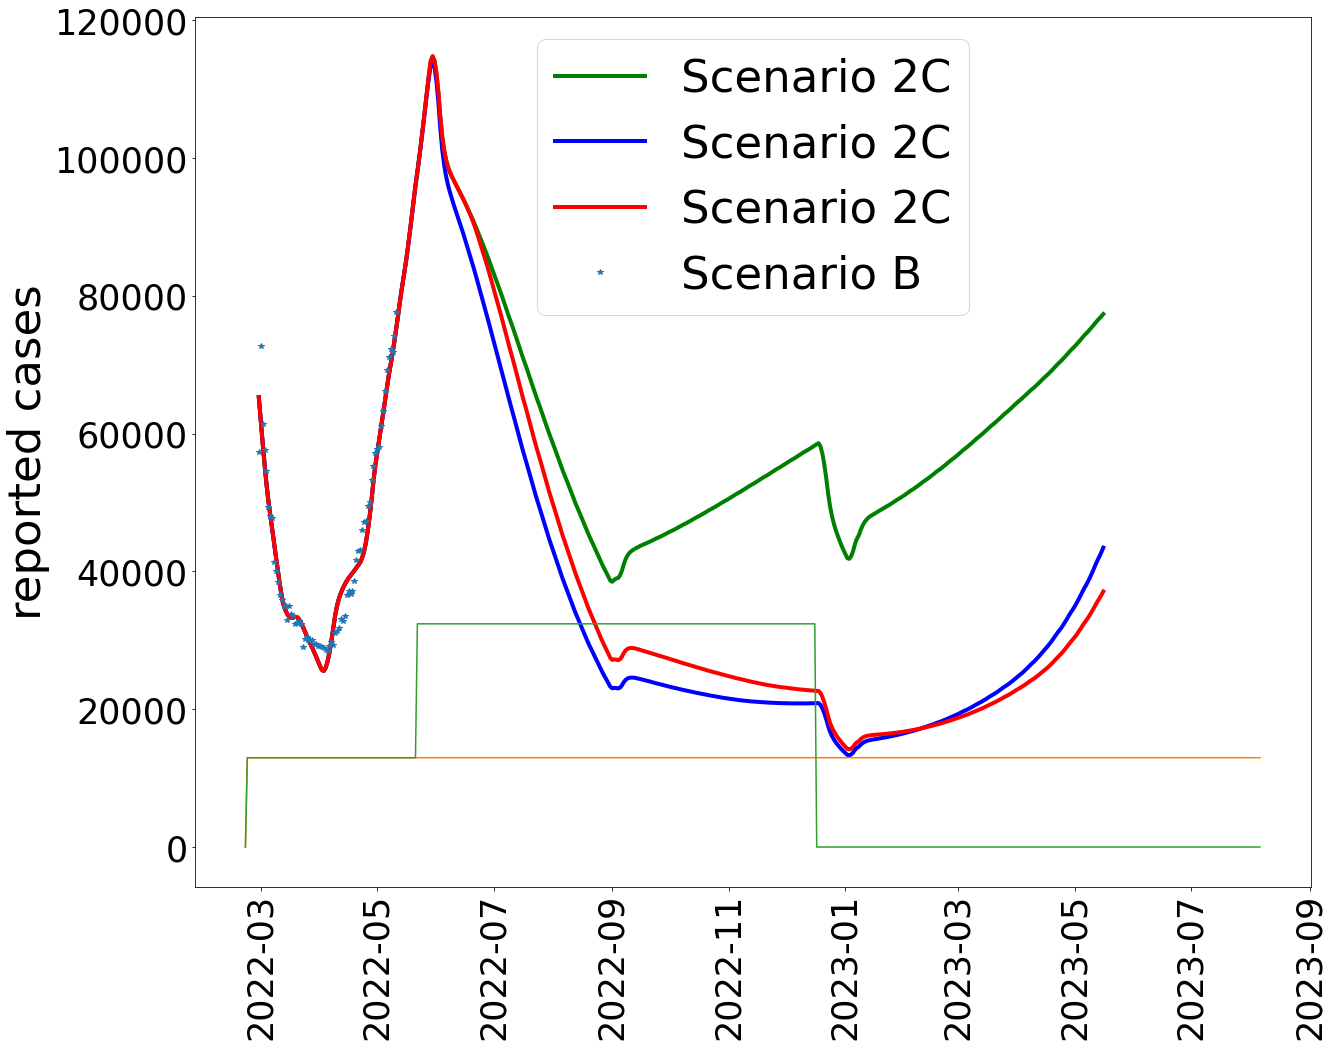

In [452]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange3 = pd.date_range("2022-02-21", periods=532, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')
#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
plt_1 = plt.figure(figsize=(20, 16))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, I_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, I_ov_avg1, 'b', label = 'Scenario 2C', lw =4)

plt.plot(drange1, I_ov_avg2, 'r', label = 'Scenario 2C', lw =4)

plt.plot(drange2, case_avg, '*', label = 'Scenario B', lw =4)


plt.plot(drange3, vacc_2[2,:])
plt.plot(drange3, vacc_3[2,:])
#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)

#plt.axis([19100, 19185, 0, 0.2e6])
plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

<Figure size 1600x1280 with 0 Axes>

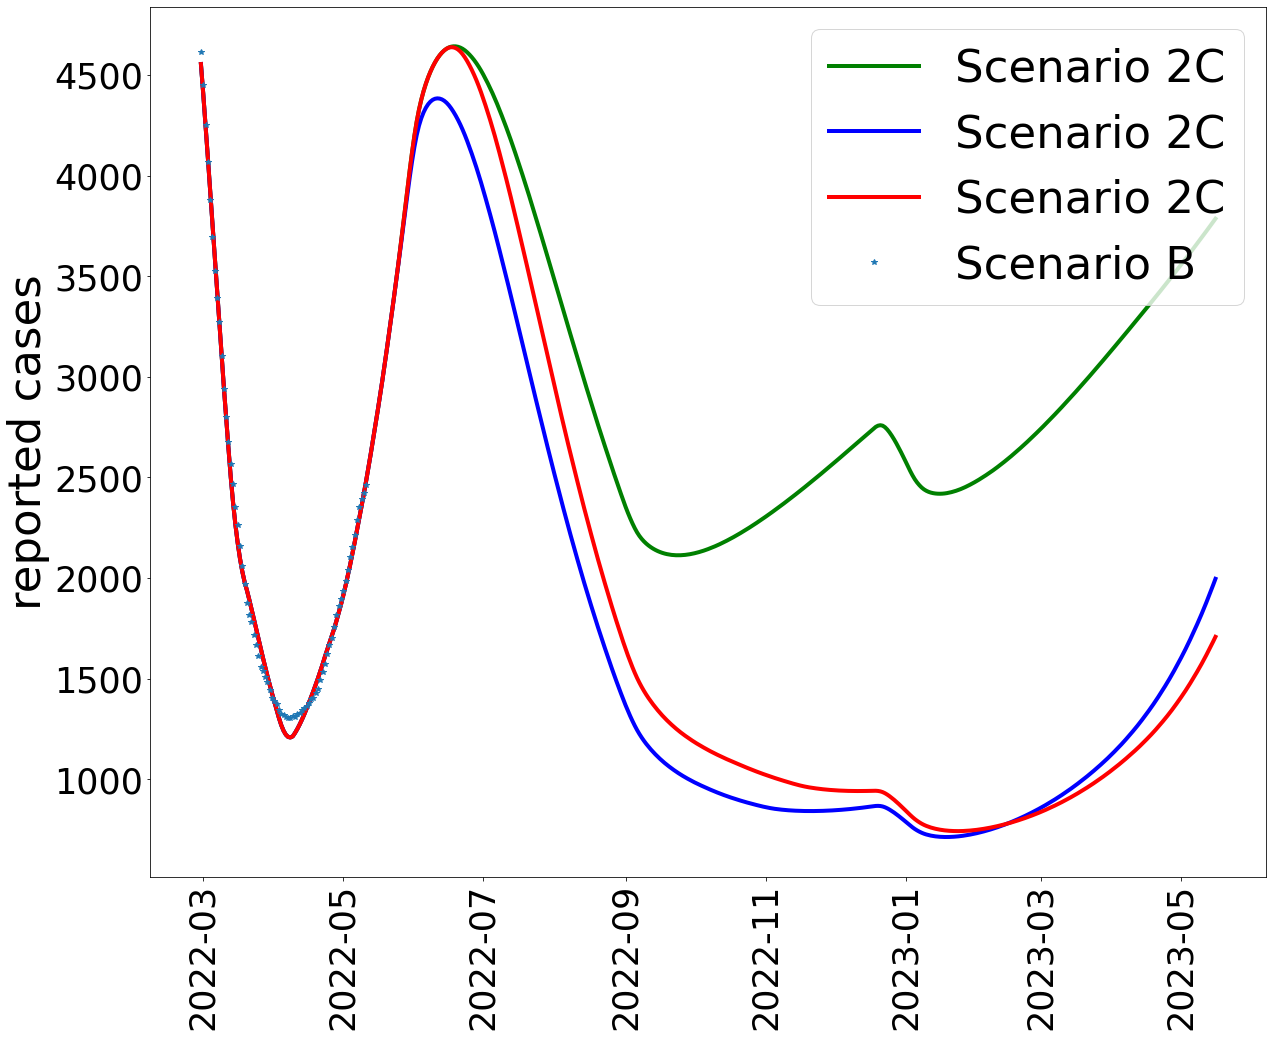

In [453]:
import matplotlib.dates as mdates

drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange3 = pd.date_range("2022-02-21", periods=532, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
plt_1 = plt.figure(figsize=(20, 16))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, H_ov_avg1, 'b', label = 'Scenario 2C', lw =4)

plt.plot(drange1, H_ov_avg2, 'r', label = 'Scenario 2C', lw =4)

plt.plot(drange2, hosp_avg, '*', label = 'Scenario B', lw =4)



#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

<Figure size 1600x1280 with 0 Axes>

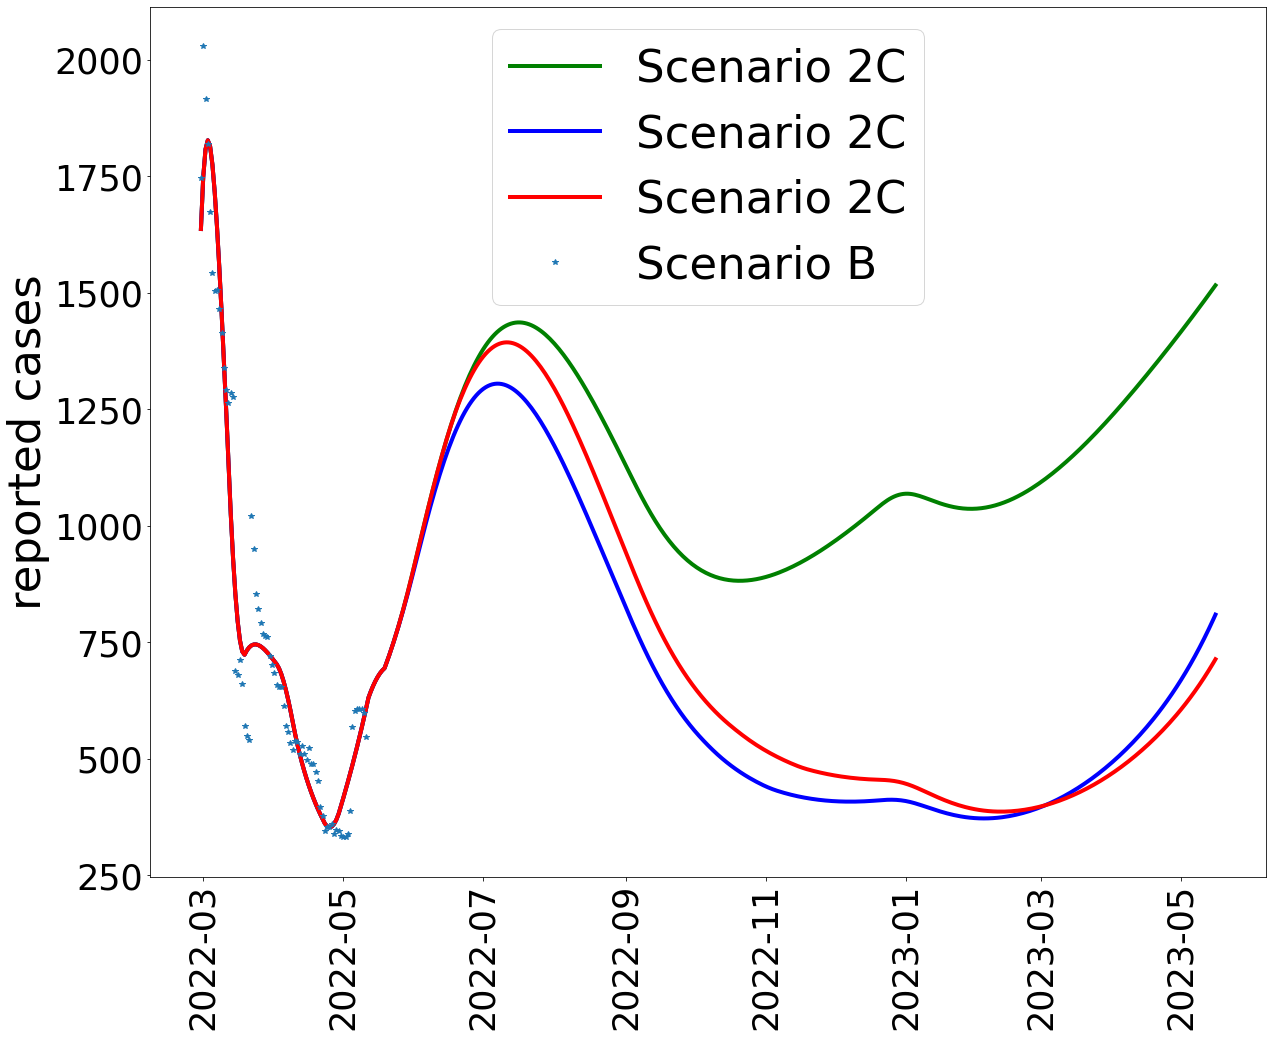

In [454]:
import matplotlib.dates as mdates

drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange3 = pd.date_range("2022-02-21", periods=532, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')

#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
plt_1 = plt.figure(figsize=(20, 16))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, D_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, D_ov_avg1, 'b', label = 'Scenario 2C', lw =4)

plt.plot(drange1, D_ov_avg2, 'r', label = 'Scenario 2C', lw =4)

plt.plot(drange2, death_avg, '*', label = 'Scenario B', lw =4)



#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

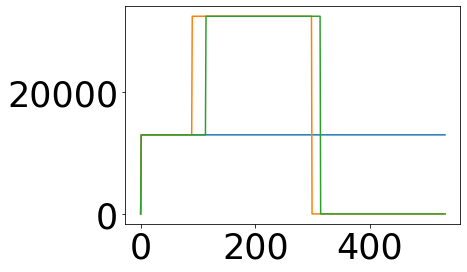

In [402]:
plt.plot(vacc_2[2,:])
plt.plot(vacc_3[2,:])
plt.plot(vacc_4[2,:])

In [456]:
np.savetxt('fit_param/popt-D.csv', popt, delimiter=',')
np.savetxt('fit_param/popt2-D.csv', popt2, delimiter=',')
np.savetxt('fit_param/popt3-D.csv', popt3, delimiter=',')


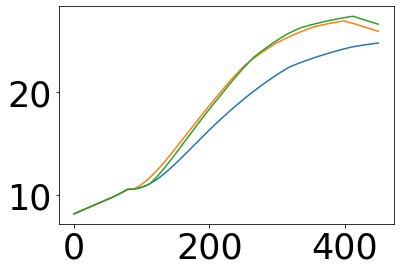

In [404]:
plt.plot(bita_s)
plt.plot(bita_s1)
plt.plot(bita_s2)

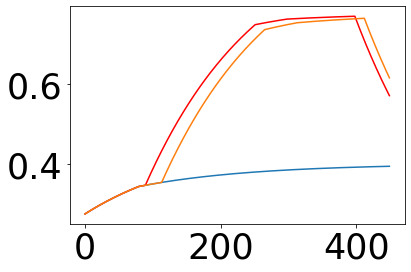

In [405]:
plt.plot(M22_ovv)
plt.plot(M22_ovv1, 'r')
plt.plot(M22_ovv2)

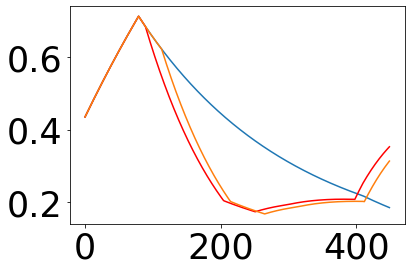

In [406]:
plt.plot(M_ovv)
plt.plot(M_ovv1, 'r')
plt.plot(M_ovv2)

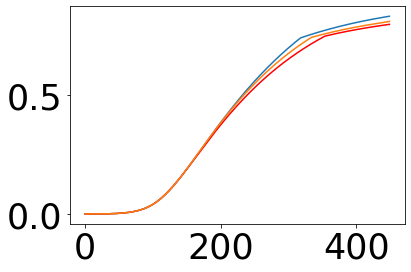

In [407]:
plt.plot(MX_ovv)
plt.plot(MX_ovv1, 'r')
plt.plot(MX_ovv2)

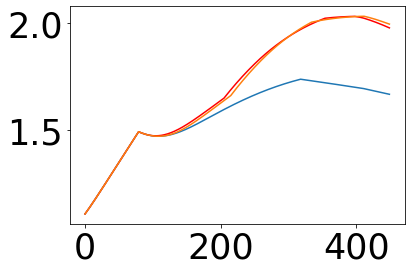

In [408]:
plt.plot(M3_ovv + M2_ovv + M_ovv + MX_ovv + M22_ovv)
plt.plot(M3_ovv1 + M2_ovv1 + M_ovv1 + MX_ovv1 + M22_ovv1, 'r')
plt.plot(M3_ovv2 + M2_ovv2 + M_ovv2 + MX_ovv2 + M22_ovv2)

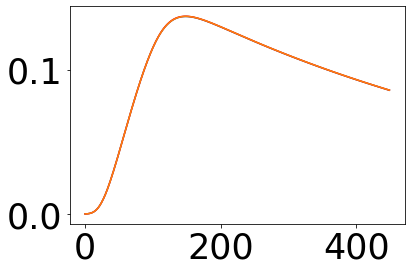

In [383]:
plt.plot(M2_ovv)
plt.plot(M2_ovv1, 'r')
plt.plot(M2_ovv2)

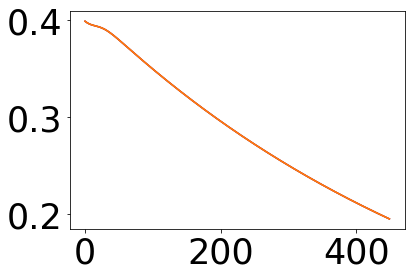

In [64]:
plt.plot(M3_ovv)
plt.plot(M3_ovv1, 'r')
plt.plot(M3_ovv2)